<a href="https://colab.research.google.com/github/data602sps/assignments/blob/master/05_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 8**

# **Weeks 10 & 11- matplotlib & seaborn**
* In this homework assignment, you will explore and analyze a public dataset of your choosing. Since this assignment is “open-ended” in nature, you are free to expand upon the requirements below. However, you must meet the minimum requirments as indicated in each section.


* The preferred method for this analysis is in a .ipynb file. Feel free to use whichever platform of your choosing.  


### **Some data examples:**
•	https://www.data.gov/

•	https://opendata.cityofnewyork.us/

•	https://datasetsearch.research.google.com/

•	https://archive.ics.uci.edu/ml/index.php

### **Resources:**

•	https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html

•	https://www.oreilly.com/library/view/python-data-science/9781491912126/ch04.html

•	https://www.data-to-viz.com/



### **Headings or comments**
**You are required to make use of comments, or headings for each section.  You must explain what your code is doing, and the results of running your code.**  Act as if you were giving this assignment to your manager - you must include clear and descriptive information for each section.

### **You may work as a group or indivdually on this assignment.**


# Introduction

In this section, please describe the dataset you are using.  Include a link to the source of this data.  You should also provide some explanation on why you choose this dataset.

I chose two related bike counting datasets from the NYC Open Data Portal that each come with a metadata dictionary:
* [Bicycle Counts](https://data.cityofnewyork.us/Transportation/Bicycle-Counts/uczf-rk3c/about_data)
    * "Bicycle counts conducted around New York City at key locations. For the counter locations."
    * Filtered for 1/1/2024 to 10/28/2024
    * Includes:
        * Count ID (for the instance of the count)
        * ID (count location ID that joins to the Bicycle Counters below)
        * Date
        * Counts 
* [Bicycle Counters](https://data.cityofnewyork.us/Transportation/Bicycle-Counters/smn3-rzf9/about_data)
    * Metadata dictionary for Bicycle Counts
    * Includes:
    * Name of count location
     * Latitudes and longitudes

For this exercise, I've decided I'm interested in:
* Trends by date and location
* Trends by hour

The two datasets can be joined on the ID column in both datasets.

______________
# Data Exploration
Import your dataset into your .ipynb, create dataframes, and explore your data.  

Include:

* Summary statistics means, medians, quartiles,
* Missing value information
* Any other relevant information about the dataset.  



Answer:
First, I will load the data from my Google Cloud Platform instance. I uploaded the files to a isolated bucket for CUNY-related work and then enabled public access. Clicking any of these links will initiate a download of the file.

In [57]:
import pandas as pd
import builtins
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns   

In [1]:
nyc_bike_counter_url = 'https://storage.googleapis.com/data_science_masters_files/2024_fall/data_602_advanced_python/week_ten/Bicycle_Counters_20241028.csv'
nyc_bike_counter_df = pd.read_csv(nyc_bike_counter_url)

nyc_bike_counts_url = 'https://storage.googleapis.com/data_science_masters_files/2024_fall/data_602_advanced_python/week_ten/Bicycle_Counts_20241028.csv'
nyc_bike_counts_df = pd.read_csv(nyc_bike_counts_url)

Next, I will define and run a function I've used in previous assignments that will give me the following dataframe information:
* Data types
* Duplicates
* NAs
* Distinct values


In [22]:
def df_deets(df_or_names):
    def print_info(df, df_name):
        print(f"{df_name}:")
        if hasattr(builtins, "display"):
            display(df)
        else:
            print(df)
        print("\n")
        
        # Summary of data types, duplicates, NAs, and distinct values
        summary_df = pd.DataFrame({
            "Data types": df.dtypes,
            "Duplicates": [df.duplicated(subset=[col]).sum() for col in df.columns],
            "NAs": df.isna().sum().values,
            "Distinct values": df.nunique().values
        }).set_index(df.columns)
        
        print(f"{df_name} summary:")
        if hasattr(builtins, "display"):
            display(summary_df)
        else:
            print(summary_df)
        print("\n")
        print(df.columns)
        print("\n")
        total_duplicates = df.duplicated().sum()
        print(f"Total number of duplicate rows in {df_name}: {total_duplicates}\n")

    if isinstance(df_or_names, list): 
        for item in df_or_names:
            if isinstance(item, str):
                df = globals()[item] 
                print_info(df, item)
            else:
                print_info(item, "dataframe")
    else: 
        if isinstance(df_or_names, str):
            df = globals()[df_or_names]  
            print_info(df, df_or_names)
        else:
            print_info(df_or_names, "dataframe")


## Data samples

### nyc_bike_counter_df data samples


In [3]:
df_deets('nyc_bike_counter_df')


nyc_bike_counter_df:


,id,name,domain,latitude,longitude,interval,timezone,sens,counter
0,100010017,Staten Island Ferry,New York City DOT,40.643387,-74.072075,15,(UTC-05:00) US/Eastern;DST,5,Y2H22104568
1,300027723,Fountain Ave,New York City DOT,40.655606,-73.862951,15,(UTC-05:00) US/Eastern;DST,5,Y2H22104569
2,100057318,Broadway at 50th St,New York City DOT,40.761380,-73.984080,15,(UTC-05:00) US/Eastern;DST,5,Y2H18055362
3,100010018,Pulaski Bridge,New York City DOT,40.742563,-73.951492,15,(UTC-05:00) US/Eastern;DST,5,Y2H22042948
4,100009426,Manhattan Bridge Ped Path,New York City DOT,40.714573,-73.994950,15,(UTC-05:00) US/Eastern;DST,5,Y2H22042941
5,100010019,Kent Ave btw North 8th St and North 9th St,New York City DOT,40.720959,-73.960930,15,(UTC-05:00) US/Eastern;DST,5,Y2H22042949
6,100010022,Brooklyn Bridge Bike Path,New York City DOT,40.709274,-74.000990,15,(UTC-05:00) US/Eastern;DST,5,Y2H22042940
7,300020241,Brooklyn Bridge Bicycle Path (Roadway),New York City DOT,40.712656,-74.004464,15,(UTC-05:00) US/Eastern;DST,5,Y2H22042943
8,100055175,Manhattan Bridge Interference Calibration 2019...,New York City DOT,0.000000,0.000000,15,(UTC-05:00) US/Eastern;DST,5,Y2H13074105
9,100058279,Kent Ave btw South 6th St. and Broadway,New York City DOT,40.711282,-73.968386,15,(UTC-05:00) US/Eastern;DST,5,NaN




nyc_bike_counter_df summary:


,Data types,Duplicates,NAs,Distinct values
id,int64,0,0,41
name,object,0,0,41
domain,object,40,0,1
latitude,float64,12,0,29
longitude,float64,12,0,29
interval,int64,39,0,2
timezone,object,40,0,1
sens,int64,40,0,1
counter,object,17,8,23




Index(['id', 'name', 'domain', 'latitude', 'longitude', 'interval', 'timezone',
       'sens', 'counter'],
      dtype='object')


Total number of duplicate rows in nyc_bike_counter_df: 0



### nyc_bike_counts_df data samples

In [4]:
df_deets('nyc_bike_counts_df')


nyc_bike_counts_df:


,countid,id,date,counts,status
0,55984471,100009425,01/01/2024 08:00:00 PM,0,0
1,55984577,100009426,01/01/2024 08:00:00 PM,0,0
2,55984676,100009427,01/01/2024 08:00:00 PM,10,0
3,55984799,100010017,01/01/2024 08:00:00 PM,0,0
4,55984905,100010018,01/01/2024 08:00:00 PM,14,0
...,...,...,...,...,...
852641,105687933,300041240,10/27/2024 11:45:00 PM,3,0
852642,105688164,300043075,10/27/2024 11:45:00 PM,0,0
852643,105688266,300043076,10/27/2024 11:45:00 PM,0,0
852644,105688464,300043077,10/27/2024 11:45:00 PM,0,0




nyc_bike_counts_df summary:


,Data types,Duplicates,NAs,Distinct values
countid,int64,0,0,852646
id,int64,852615,0,31
date,object,823834,0,28812
counts,int64,852290,0,356
status,int64,852645,0,1




Index(['countid', 'id', 'date', 'counts', 'status'], dtype='object')


Total number of duplicate rows in nyc_bike_counts_df: 0



# Data Wrangling

Perform data wrangling.  You are free to use your best judgment here.  If you are stuck, look at previous assignment.

Answer:
First, I'll join the two dataframes on the ID column. This will give me one complete view of the bike counting data.


In [5]:
nyc_bike_combined_df = nyc_bike_counts_df.merge(nyc_bike_counter_df, on='id')
nyc_bike_combined_copy_df = nyc_bike_combined_df.copy()

In [6]:
df_deets('nyc_bike_combined_df')

nyc_bike_combined_df:


,countid,id,date,counts,status,name,domain,latitude,longitude,interval,timezone,sens,counter
0,55984471,100009425,01/01/2024 08:00:00 PM,0,0,Prospect Park West,New York City DOT,40.671288,-73.971382,60,(UTC-05:00) US/Eastern;DST,5,Y2H21121588
1,55984577,100009426,01/01/2024 08:00:00 PM,0,0,Manhattan Bridge Ped Path,New York City DOT,40.714573,-73.994950,15,(UTC-05:00) US/Eastern;DST,5,Y2H22042941
2,55984676,100009427,01/01/2024 08:00:00 PM,10,0,Williamsburg Bridge Bike Path,New York City DOT,40.710530,-73.961450,15,(UTC-05:00) US/Eastern;DST,5,Y2H22042936
3,55984799,100010017,01/01/2024 08:00:00 PM,0,0,Staten Island Ferry,New York City DOT,40.643387,-74.072075,15,(UTC-05:00) US/Eastern;DST,5,Y2H22104568
4,55984905,100010018,01/01/2024 08:00:00 PM,14,0,Pulaski Bridge,New York City DOT,40.742563,-73.951492,15,(UTC-05:00) US/Eastern;DST,5,Y2H22042948
...,...,...,...,...,...,...,...,...,...,...,...,...,...
852641,105687933,300041240,10/27/2024 11:45:00 PM,3,0,Ocean Pkwy at Avenue J,New York City DOT,40.624303,-73.970609,15,(UTC-05:00) US/Eastern;DST,5,Y2H22104567
852642,105688164,300043075,10/27/2024 11:45:00 PM,0,0,Emmons Ave Peds,New York City DOT,40.584100,-73.930990,15,(UTC-05:00) US/Eastern;DST,5,YAH22104564
852643,105688266,300043076,10/27/2024 11:45:00 PM,0,0,Emmons Ave Bikes,New York City DOT,40.584100,-73.930990,15,(UTC-05:00) US/Eastern;DST,5,YAH22104564
852644,105688464,300043077,10/27/2024 11:45:00 PM,0,0,High Bridge Peds,New York City DOT,40.842190,-73.932070,15,(UTC-05:00) US/Eastern;DST,5,YAH22104566




nyc_bike_combined_df summary:


,Data types,Duplicates,NAs,Distinct values
countid,int64,0,0,852646
id,int64,852615,0,31
date,object,823834,0,28812
counts,int64,852290,0,356
status,int64,852645,0,1
name,object,852615,0,31
domain,object,852645,0,1
latitude,float64,852625,0,21
longitude,float64,852625,0,21
interval,int64,852644,0,2




Index(['countid', 'id', 'date', 'counts', 'status', 'name', 'domain',
       'latitude', 'longitude', 'interval', 'timezone', 'sens', 'counter'],
      dtype='object')


Total number of duplicate rows in nyc_bike_combined_df: 0



After reviewing the above, I can see that:
*  `status`, `domain`, `timezone`, and `sens` have one distinct value each
*  `id` isjust the distinct numeric representation of the count location
* `date` is currently a string  and needs to be converted to a datetime object

I'll convert the `date` column to a datetime object and drop the columns I don't need.  

In [13]:
nyc_bike_combo_df = nyc_bike_combined_df.drop(columns=['countid', 'id', 'status', 'domain', 'latitude', 'longitude', 'interval', 'timezone', 'sens', 'counter'])
nyc_bike_combo_df['date'] = pd.to_datetime(nyc_bike_combo_df['date'], format='%m/%d/%Y %I:%M:%S %p')
df_deets('nyc_bike_combo_df')


nyc_bike_combo_df:


,date,counts,name
0,2024-01-01 20:00:00,0,Prospect Park West
1,2024-01-01 20:00:00,0,Manhattan Bridge Ped Path
2,2024-01-01 20:00:00,10,Williamsburg Bridge Bike Path
3,2024-01-01 20:00:00,0,Staten Island Ferry
4,2024-01-01 20:00:00,14,Pulaski Bridge
...,...,...,...
852641,2024-10-27 23:45:00,3,Ocean Pkwy at Avenue J
852642,2024-10-27 23:45:00,0,Emmons Ave Peds
852643,2024-10-27 23:45:00,0,Emmons Ave Bikes
852644,2024-10-27 23:45:00,0,High Bridge Peds




nyc_bike_combo_df summary:


,Data types,Duplicates,NAs,Distinct values
date,datetime64[ns],823834,0,28812
counts,int64,852290,0,356
name,object,852615,0,31




Index(['date', 'counts', 'name'], dtype='object')


Total number of duplicate rows in nyc_bike_combo_df: 0



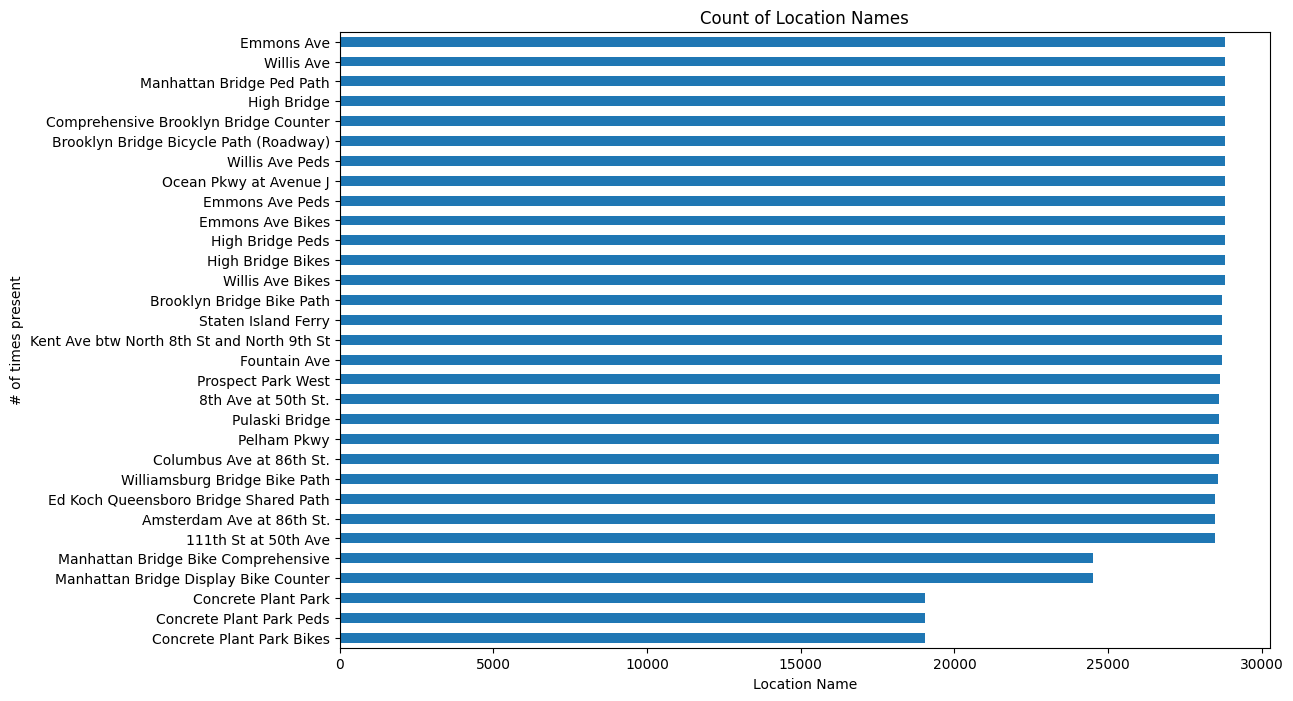

In [24]:
value_counts = nyc_bike_combo_df['name'].value_counts()
value_counts.plot(kind='barh', figsize=(12,8))
plt.xlabel('Location Name')
plt.ylabel('# of times present')
plt.title('Count of Location Names')
plt.gca().invert_yaxis()
plt.show()


# Visualizations
The main purpose of this assignment is to practice creating various visualizations using the matplotlib and seaborn library.


### **Part 1:**
Using matplotlib, create ***two or more plots*** that incorporate at least **5** of the following properties:

Note: these properties vary based on your data.  The goal is to practice creating visualizations and modifying its properties.

*   Use and change a legend position
*   Change a legend font size
*   Place a legend outside of the plot
*   Create a single legend for all subplots
*   Change the title and x/y labels
*   Change the marker, line colors, and line width
*   Add annotations
*   Modify Axis Text Ticks/Labels
*   Change size of axis Labels
*   Your own choice not included above


Plots that you can create **include**:

*   Scatter Plot
*   Bar plot
*   Line Chart
*   Multi Plots (e.g. using .subplot()
*   Histogram

You can add another plot not listed here if it works better for your data.  This is not a complete list of plots to create.

Answer:
This first plot shows the number of bikes counted by each NYC DOT count location for the date range of 1/1/2024 to 10/28/2024. It satisfies the following requirements from the assignment:
* Addition of annotations
* Change the title and x/y labels
* Change size of axis labels


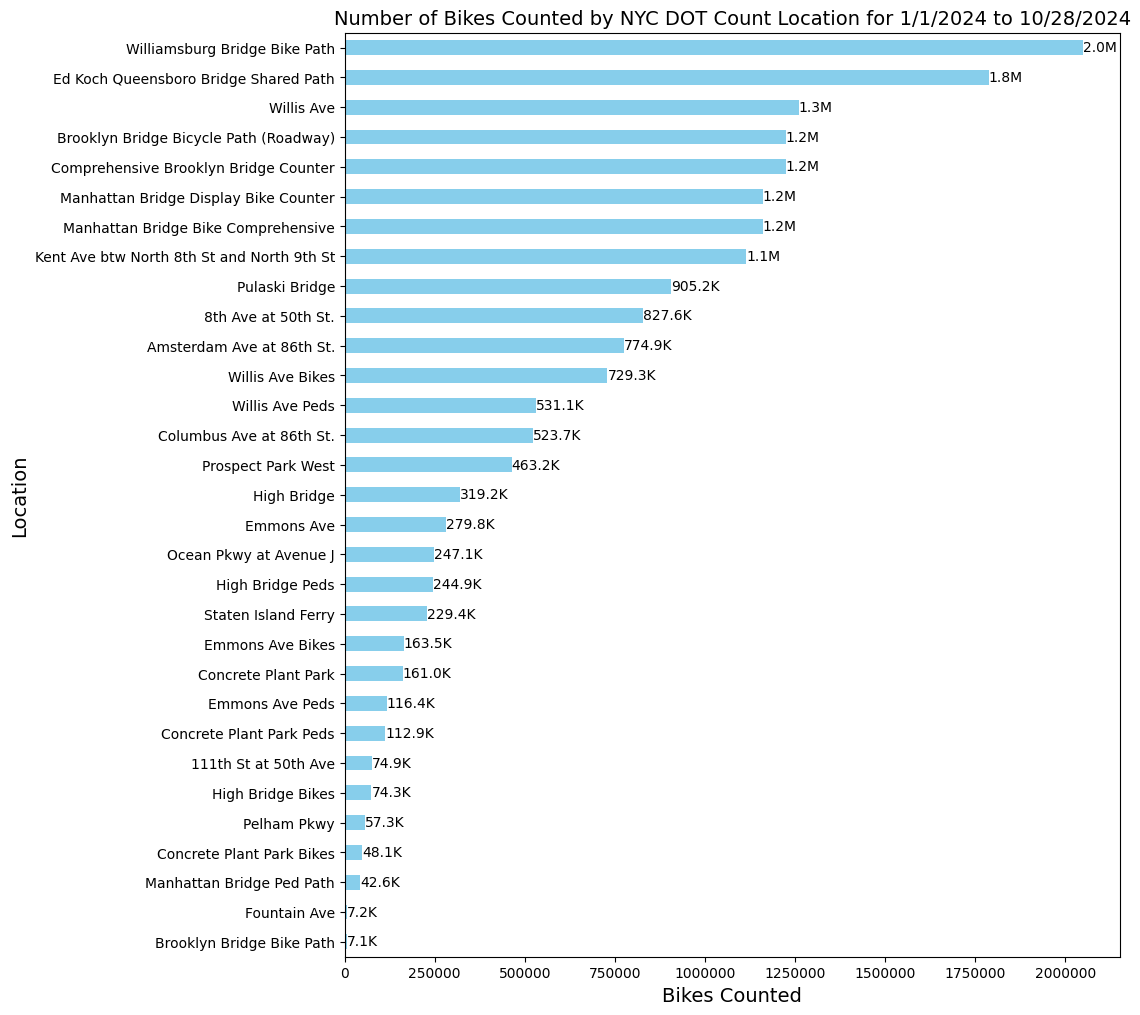

In [48]:
location_counts = nyc_bike_combined_df.groupby('name')['counts'].sum().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(10, 12))
location_counts.plot(kind='barh', ax=ax, color='skyblue')

plt.xlabel('Bikes Counted', fontsize=14)
plt.ylabel('Location', fontsize=14)
plt.title('Number of Bikes Counted by NYC DOT Count Location for 1/1/2024 to 10/28/2024', fontsize=14)
plt.gca().invert_yaxis()
plt.ticklabel_format(style='plain', axis='x')
def format_value(value):
    if value >= 1_000_000:
        return f'{value / 1_000_000:.1f}M'
    elif value >= 1_000:
        return f'{value / 1_000:.1f}K'
    else:
        return f'{value}'

for index, value in enumerate(location_counts):
    ax.text(value, index, format_value(value), va='center') 

plt.show()


This second plot shows the average number of bikes counted by hour and month for the same date range. It satisfies the following requirements from the assignment:
*   Use and change a legend position
*   Change a legend font size
*   Place a legend outside of the plot

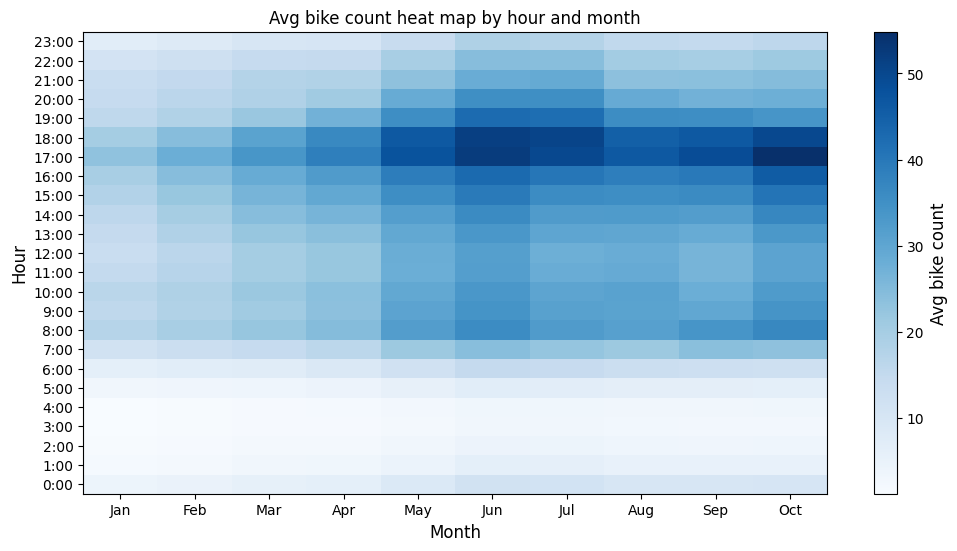

In [64]:
nyc_bike_combined_df['hour'] = nyc_bike_combined_df['date'].dt.hour
nyc_bike_combined_df['month'] = nyc_bike_combined_df['date'].dt.month

mpl_aggs = nyc_bike_combined_df.groupby(['hour', 'month'])['counts'].mean().unstack()
fig, ax = plt.subplots(figsize=(12, 6))
bike_bars = ax.imshow(mpl_aggs, aspect='auto', cmap='Blues')
cbar = fig.colorbar(bike_bars, ax=ax, orientation='vertical')
cbar.set_label('Avg bike count', fontsize=12)
ax.set_title('Avg bike counts by hour and month', fontsize=12)
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Hour', fontsize=12)
ax.set_xticks(np.arange(10))  
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct'])
ax.set_yticks(np.arange(24))  
ax.set_yticklabels([f'{hour}:00' for hour in range(24)])
ax.invert_yaxis()

plt.show()


### **Part 2:**

Recreate the visualizations above using the Seaborn library as best as possible.  

**You are required to explain what each of your plots is representing. Plots without comments will not be accepted.**  In addition, please explain the properties you are showcasing.


#### Recreation of `Number of Bikes Counted by NYC DOT Count Location` bar plot using seaborn.

Answer:
This is a recreation of the first bar chart using seaborn and represents the number of bikes counted by each NYC DOT count location for calendar year 2024 to 10/28/2024. I had to make a few changes to the data to make it compatible with seaborn:
* It now uses `sns.barplot` instead of `plot(kind='barh')`
* It resets the index of `sns_counts` to turn it into a dataframe
* It adds labels and annotations in the same manner as before

The end result is a chart that looks similar but leverages seaborn’s cleaner syntax and styling.


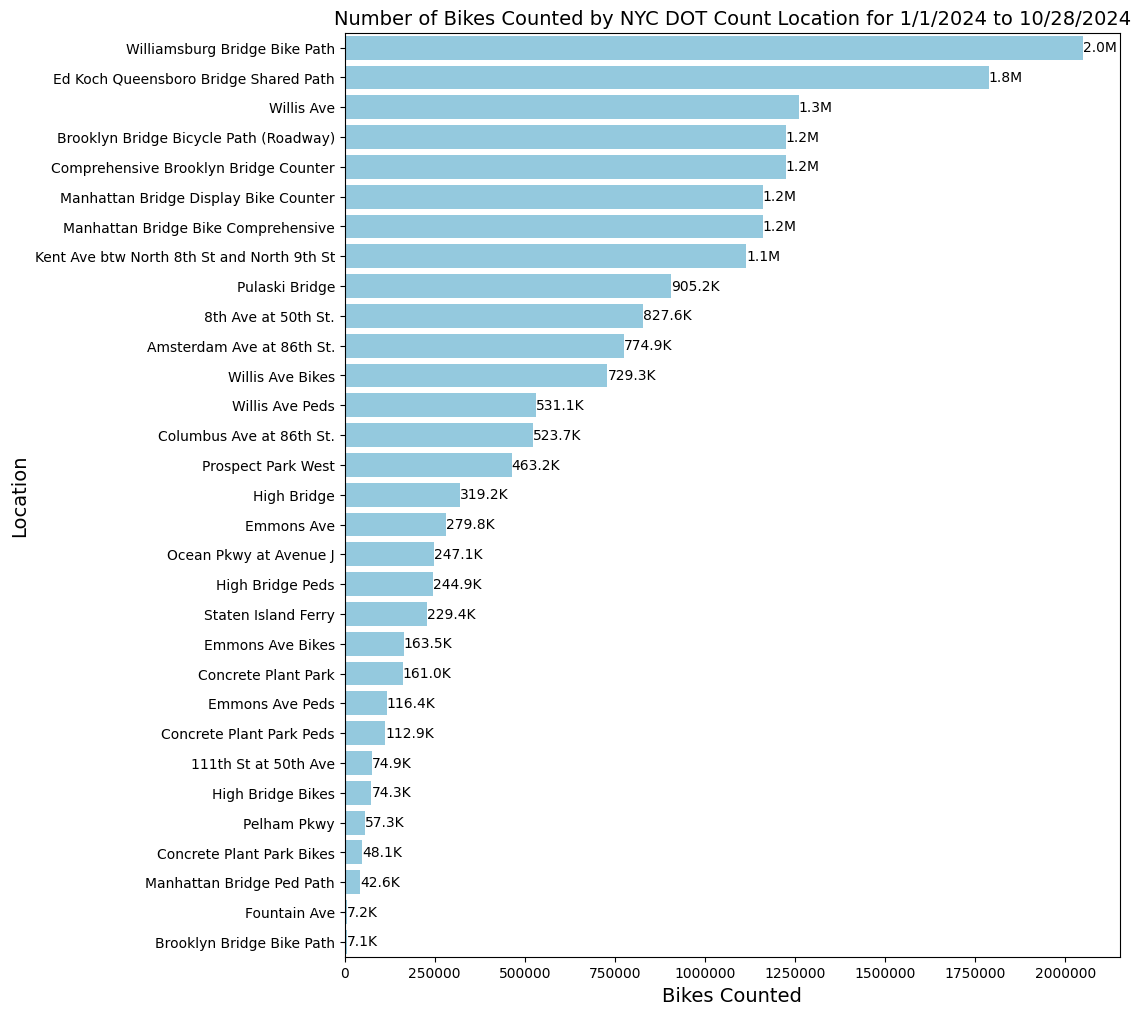

In [58]:
sns_counts = nyc_bike_combined_df.groupby('name')['counts'].sum().sort_values(ascending=False).reset_index()
fig, ax = plt.subplots(figsize=(10, 12))
sns.barplot(data=sns_counts, y='name', x='counts', ax=ax, color='skyblue')
ax.set_xlabel('Bikes Counted', fontsize=14)
ax.set_ylabel('Location', fontsize=14)
ax.set_title('Number of Bikes Counted by NYC DOT Count Location for 1/1/2024 to 10/28/2024', fontsize=14)
ax.ticklabel_format(style='plain', axis='x')

def format_value(value):
    if value >= 1_000_000:
        return f'{value / 1_000_000:.1f}M'
    elif value >= 1_000:
        return f'{value / 1_000:.1f}K'
    else:
        return f'{value}'

for index, value in enumerate(sns_counts['counts']):
    ax.text(value, index, format_value(value), va='center')

plt.show()


#### Recreation of `Avg bike count heat map by hour and month` heat map using seaborn

Answer:
I made the folllowing changes to allow the same heat map to be created using seaborn:   
    * Switched from `plt.imshow` to `sns.heatmap`, which is better suited for matrix-ish data in seaborn
    * Cheerfully stopped manually setting the color bar by using `cbar_kws` in `sns.heatmap` to have labels added directly
    * Converted the grouped data into a pivot table so it fits seaborn's heatmap format without needing unstack


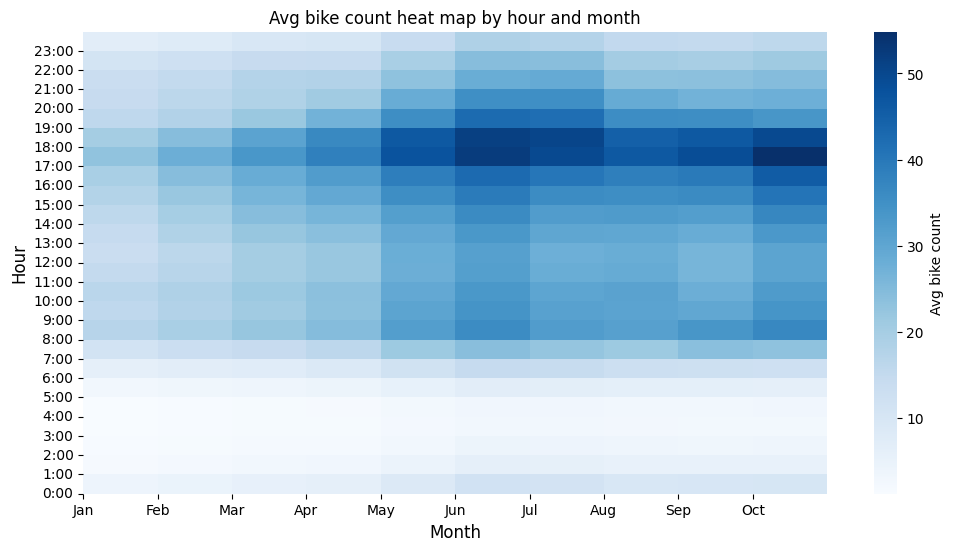

In [63]:
sns_aggs = nyc_bike_combined_df.groupby(['hour', 'month'])['counts'].mean().reset_index()
sns_aggs_pivot = sns_aggs.pivot(index='hour', columns='month', values='counts')

plt.figure(figsize=(12, 6))
ax = sns.heatmap(sns_aggs_pivot, cmap='Blues', cbar_kws={'label': 'Avg bike count'})

ax.set_title('Avg bike count heat map by hour and month', fontsize=12)
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Hour', fontsize=12)
ax.set_xticks(np.arange(10))
ax.set_yticks(np.arange(24)) 
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct'])
ax.set_yticklabels([f'{hour}:00' for hour in range(24)], rotation=0, ha='right', fontsize=10)
ax.invert_yaxis()

plt.show()

### **Part 3:**
In a comment or text box, explain the differences between creating a plot in matplotlib and seaborn, based on your above plots.



Answer: 
`matplotlib` requires a more methodical and granular setup than `seaborn` does. With `seaborn`, you can create a plot with a less upfront work and still get a result that is presentable.  The downside is that you're giving up a lot of control over the look and feel of the plot.  Depending on how much control you need, you may find yourself wanting to use `matplotlib` instead of `seaborn`. It's a value proposition at the end of the day.

# Conclusions  

After exploring your dataset, provide a short summary of what you noticed from this dataset.  

It wasn't surprising to see that the most popular times of the year to bike outdoors in NYC were during the golden hours of 5-8pm. I am interested to knnow more about the pull back in the early fall that was followed immediately by the darkest spots on the whole map. Spring 2024 was brutally cold so the slow wind up checks out. In a follow up I would get into the location specific details to see if pattterns start to diverge at the local level.